In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Classified Data',index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.drop('TARGET CLASS',axis=1).columns)

In [10]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [11]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df_feat[['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']]

In [14]:
y = df['TARGET CLASS']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [22]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [23]:
error_rate = []

for i in range(1,100):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 0, 'K')

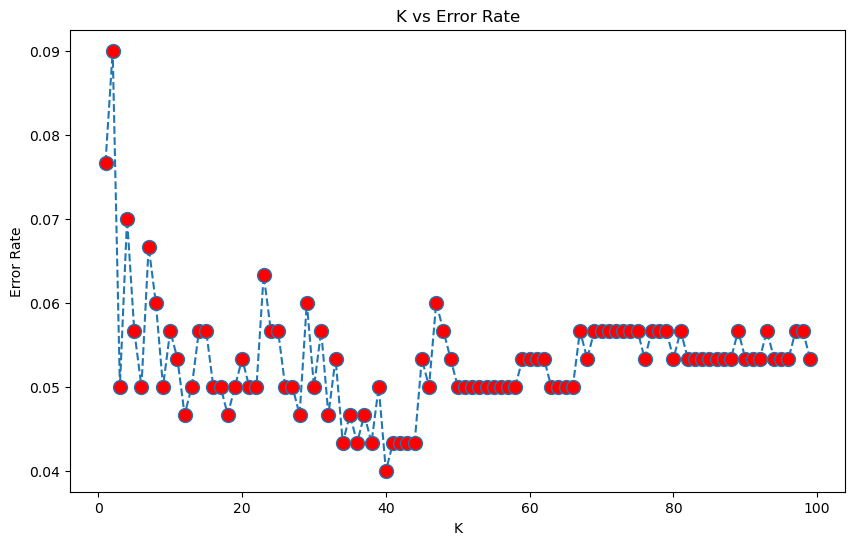

In [24]:
figure = plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,linestyle='--',marker='o',markerfacecolor='r',markersize=10)
plt.title('K vs Error Rate')
plt.ylabel('Error Rate')
plt.xlabel('K')

In [25]:
import cufflinks as cf
cf.go_offline()

In [26]:
r = range(1,40)

In [27]:
er = pd.DataFrame({'Error rate':error_rate}, index=range(1,100))

In [28]:
er.index.name = 'K'

In [29]:
# Reset index and set a new index starting from 1
er = er.reset_index(drop=True)
er.index = range(1, len(er) + 1)

# Now both 'K' and 'Error rate' will be columns with row numbers starting from 1
er
# Reset index and set a new index starting from 1
er = er.reset_index(drop=True)
er.index = range(1, len(er) + 1)
er.index.name = 'K'  # Add this line to restore the index name


In [30]:
er = er.reset_index(drop=True)

In [31]:
er.index = range(1,100)

In [32]:
er

,Error rate
1,0.076667
2,0.090000
3,0.050000
4,0.070000
5,0.056667
...,...
95,0.053333
96,0.053333
97,0.056667
98,0.056667


In [33]:
er[er['Error rate'] == er['Error rate'].min()]

,Error rate
40,0.04


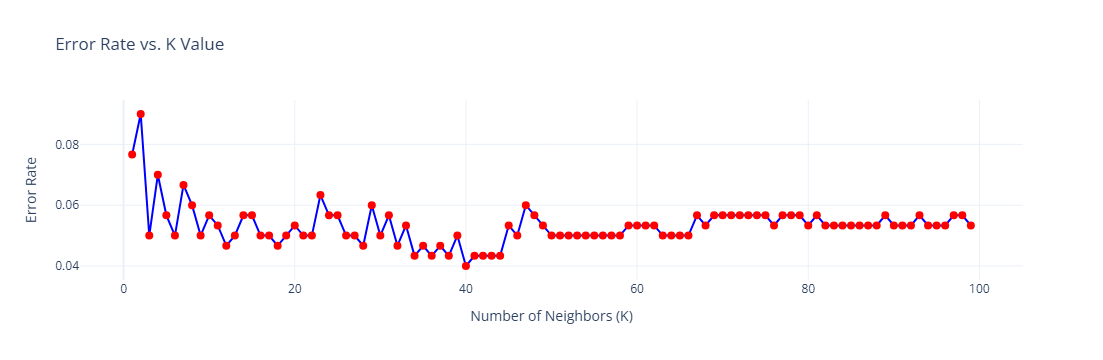

In [34]:
import plotly.express as px
import pandas as pd

# Create DataFrame with your data
df = pd.DataFrame({
    'K': list(range(1, 100)),
    'Error Rate': error_rate
})

# Create interactive plot
fig = px.line(df, x='K', y='Error Rate', markers=True,
              title='Error Rate vs. K Value',
              labels={'K': 'Number of Neighbors (K)', 'Error Rate': 'Error Rate'},
              template='plotly_white')

# Customize hover information
fig.update_traces(
    mode='lines+markers',
    marker=dict(size=8, color='red'),
    line=dict(width=2, color='blue'),
    hovertemplate='K: %{x}<br>Error Rate: %{y:.4f}<extra></extra>'
)

# Show the plot
fig.show()


In [35]:
er[er['Error rate'] == er['Error rate'].min()]

,Error rate
40,0.04


Text(0, 0.5, 'Error Rate')

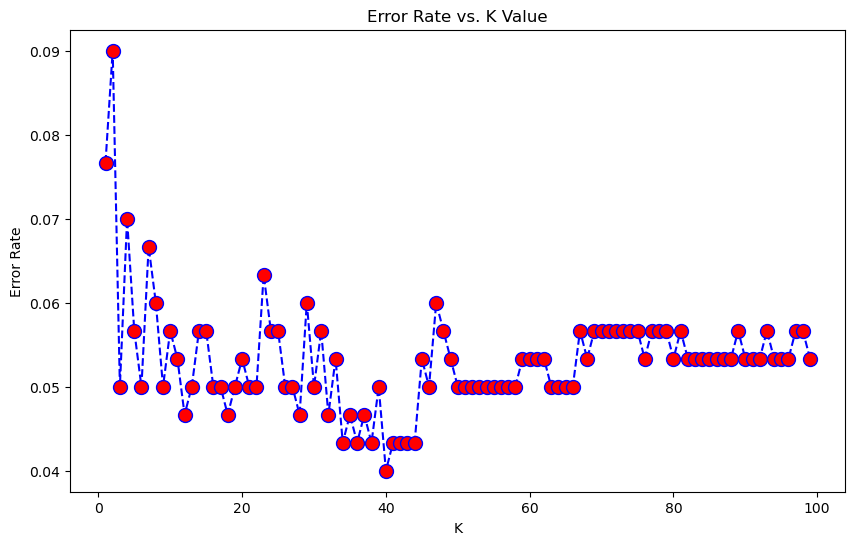

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100), error_rate, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [37]:
knn = KNeighborsClassifier(n_neighbors=34)

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=34)

In [39]:
pred = knn.predict(X_test)

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [41]:
print(confusion_matrix(y_test,pred))

[[153   6]
 [  7 134]]


In [99]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)
pred_r = knn.predict(X_test)
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



[[153   6]
 [  7 134]]
